In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from lib.language.gpt import GPTClient
from dotenv import load_dotenv
import os

load_dotenv()

API_KEY = os.environ["OPEN_AI_API_KEY"]

client = GPTClient(API_KEY)


In [5]:
from core.assembly.debate.most_points import MostPointsDebateAssembly
from core.tools.research.new_york_times import NewYorkTimesTool
from core.tools.research.wikipedia import WikipediaTool
from core.tools.toolbelt import Toolbelt
from lib.agent_log import agent_log, AgentLogLevel

agent_log.set_log_level(AgentLogLevel.SPEECH)

assembly = MostPointsDebateAssembly(
    client,
    n_teams=5,
    toolbelt=Toolbelt(client, [WikipediaTool(client, n_pages=5)])
)
await assembly.prompt("Elon Musk will ultimately make Twitter profitable, and recooperate the initial financial loss he took when buying it.")

DebateTeam is starting a conversation about whether "Elon Musk will ultimately make Twitter profitable, and recooperate the initial financial loss he took when buying it." is true.
Hank: I believe Elon Musk will ultimately make Twitter profitable, and recooperate the initial financial loss he took when buying it.
Sabrina: I believe Elon Musk will ultimately fail to make Twitter profitable and never recover the initial financial loss he took when buying it.
Hank: Thank you for your response. While I understand your concerns about Elon Musk's ability to make Twitter profitable, I believe that there are several potential strategies that he could pursue to increase revenue and recoup the initial financial loss he took when buying the platform.

Firstly, it is true that Musk would face financial challenges in owning Twitter, as reported by The New York Times. However, this report also notes that Twitter has difficulty turning a profit, which suggests that the company's financial struggles p

AssemblyResponse(in_favor=12, against=9, undecided=4, percent_in_favor=0.5714285714285714, error_bar=0.19047619047619047, summaries=[["Sabrina. I found her argument to be more persuasive due to her strong use of evidence and logical reasoning, as well as her ability to stay on topic and address all of the main issues at hand. While Hank made some good points about Musk's potential strategies for increasing revenue, he did not address many of Sabrina's concerns about Twitter's underlying business model issues or Musk's priorities for the platform.", '"Thank you both for your thoughtful arguments. Hank, you make a compelling case that Twitter\'s past struggles with profitability and slowing advertising revenue growth could hinder Musk\'s ability to turn a profit. You also raise valid concerns about content moderation under Musk\'s leadership. Sabrina, you bring up some potential strategies for increasing revenue, such as introducing a subscription model and improving the user experience 

In [6]:
from core.tools.toolbelt import Toolbelt
from core.tools.research.new_york_times import NewYorkTimesTool
from core.tools.research.wikipedia import WikipediaTool
from lib.agent_log import agent_log, AgentLogLevel
from core.assembly.debate.most_points import MostPointsDebateAssembly, AssemblyResponse

agent_log.set_log_level(AgentLogLevel.THOUGHT)
date_ranges = [
    ('20220501', '20220601'),
    ('20220601', '20220701'),
    ('20220701', '20220801'),
    ('20220801', '20220901'),
    ('20220901', '20221001'),
    ('20221001', '20221108'),
]

for range in date_ranges:
    assembly = MostPointsDebateAssembly(client, Toolbelt(client, [NewYorkTimesTool(client, n_pages=3, begin_date=range[0], end_date=range[1])]),n_teams=5)
    results[range] =  await assembly.prompt("Democrats will maintain control of the Senate in the 2022 November Midterm elections.")

results 

{('20220501',
  '20220601'): AssemblyResponse(in_favor=7, against=7, undecided=1, percent_in_favor=0.5, error_bar=0.07142857142857142, summaries=[['Sabrina.', 'As an AI language model, I cannot provide an opinion on who is correct or not. It is up to you as the team lead to evaluate the debate using the rubric provided and make a decision based on your own analysis of the arguments presented by Hank and Sabrina.', 'Sabrina. She provided strong evidence to support her argument, analyzed both historical patterns and current trends in voter sentiment and polling data, addressed potential counterarguments to her position, and presented her argument clearly and persuasively. While Hank made some good points, he did not provide as much evidence to support his argument as Sabrina did and could have been more persuasive in making his case.'], ["Hank. While both analysts presented valid points, Hank's argument was more persuasive overall due to his use of specific evidence and nuanced analysis 

In [4]:
results

{('20220601',
  '20220701'): AssemblyResponse(in_favor=7, against=8, undecided=0, percent_in_favor=0.4666666666666667, error_bar=0.0, summaries=[["Sabrina. Her analysis was more well-supported by evidence, logical reasoning, and consideration of counterarguments. Therefore, I will make my decision based on Sabrina's analysis that Democrats will maintain control of the Senate in the 2022 November Midterm elections.", "Sabrina. Based on the rubric criteria and the information provided, Sabrina's argument was more convincing due to her use of specific data points and references to polls and news articles, as well as her logical reasoning and clarity in presenting her argument. Therefore, I would choose to side with Sabrina in this debate.", "Dan: Thank you, Hank and Sabrina, for your insightful debate on the upcoming midterm elections. From what I understand, Hank believes that Republicans have a strong chance of gaining control of the Senate due to recent polling data showing a shift tow

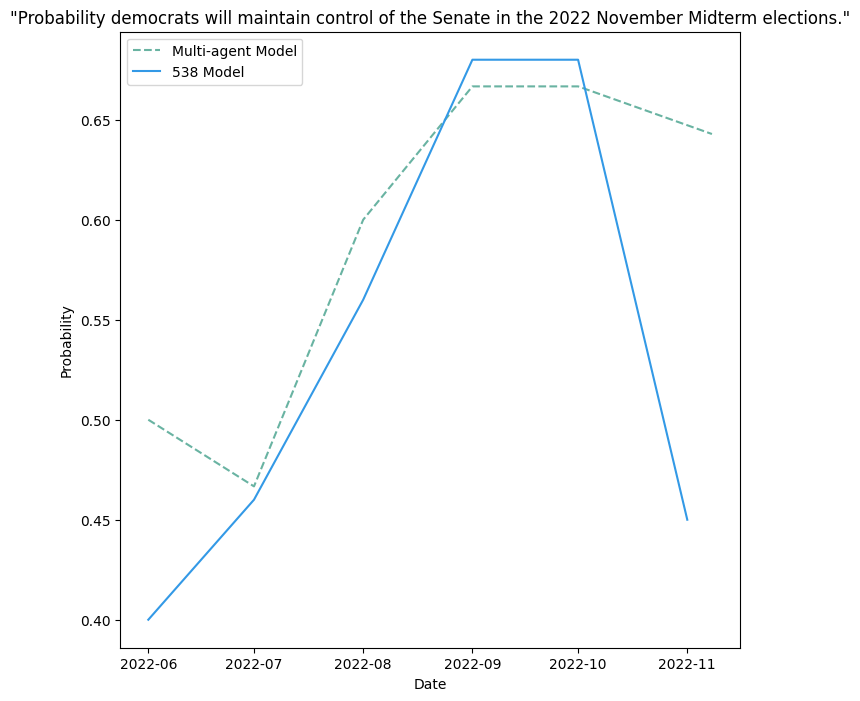

In [7]:
import matplotlib.pyplot as plt
from datetime import datetime

COLOR_SENTIMENT = "#69b3a2"
COLOR_SAP = "#3399e6"
  
fig, ax1 = plt.subplots(figsize=(8, 8))

# plotting the points 

ax1.plot([datetime(int(r[1][0:4]), int(r[1][4:6]), int(r[1][6:8])) for r in results.keys()], [(r.percent_in_favor) for r in results.values()], color=COLOR_SENTIMENT, linestyle="dashed", label="Multi-agent Model")
ax1.plot([datetime(int(r[0:4]), int(r[4:6]), int(r[6:8])) for r in ['20220601', '20220701', '20220801', '20220901', '20221001', '20221101']], [1 -r for r in [0.60, 0.54, 0.44, 0.32, 0.32, 0.55]], color=COLOR_SAP, label="538 Model")

ax1.set_ylabel("Probability")
ax1.set_xlabel("Date")

ax1.legend()
  
# giving a title to my graph
plt.title('"Probability democrats will maintain control of the Senate in the 2022 November Midterm elections."')
  
# function to show the plot
plt.show()

In [19]:
from core.tools.toolbelt import Toolbelt
from core.tools.research.new_york_times import NewYorkTimesTool
from core.tools.research.wikipedia import WikipediaTool
from lib.agent_log import agent_log, AgentLogLevel
from core.assembly.debate.most_points import MostPointsDebateAssembly, AssemblyResponse

agent_log.set_log_level(AgentLogLevel.THOUGHT)
date_ranges = [
    ('20210901', '20220101'),
    ('20220401', '20220701'),
    ('20220701', '20221001'),
    ('20221001', '20230101'),
    ('20230101', '20230401'),
    ('20230401', '20230601'),
]

results = {}

for range in date_ranges:
    assembly = MostPointsDebateAssembly(client, Toolbelt(client, [NewYorkTimesTool(client, n_pages=3, begin_date=range[0], end_date=range[1])]),n_teams=5)
    results[range] =  await assembly.prompt("The price of Bitcoin will be higher in three months than it is today.")

results 

DebateTeam is starting a conversation about whether "The price of Bitcoin will be higher in three months than it is today." is true.
Hank: I believe The price of Bitcoin will be higher in three months than it is today.
Sabrina: I believe The price of Bitcoin will be lower in three months than it is today.
Hank wonders: What are the current market trends and indicators that suggest the price of Bitcoin will continue to rise?
...Agent is using tool NewYorkTimesTool with args Bitcoin, market trends, price indicators...


/Users/danielbalsam/super_intelligence/SuperIntelligence/core/tools/research/new_york_times.py:67: RuntimeWarning: coroutine 'NewYorkTimesTool._search' was never awaited
  self._search(session, query)


...Agent is using tool NewYorkTimesTool with args Bitcoin, market, trends...
...Agent is using tool NewYorkTimesTool with args Bitcoin, market, trends...
Hank thinks: I. Introduction
- State the topic of debate and your position on it.

II. Historical trends
- Discuss how the price of Bitcoin has historically increased over time.
- Cite specific examples of when the price has risen after a period of decline.

III. Current market conditions
- Analyze current market conditions and how they suggest a potential increase in price.
- Discuss factors such as increased institutional investment and growing mainstream acceptance.

IV. Technical analysis
- Use technical analysis to support your argument.
- Analyze charts and patterns to show potential for an upward trend.

V. Counterargument rebuttal
- Address your opponent's argument that the price will be lower in three months.
- Dispute their reasoning with evidence from historical trends, current market conditions, and technical analysis.

VI

CancelledError: 

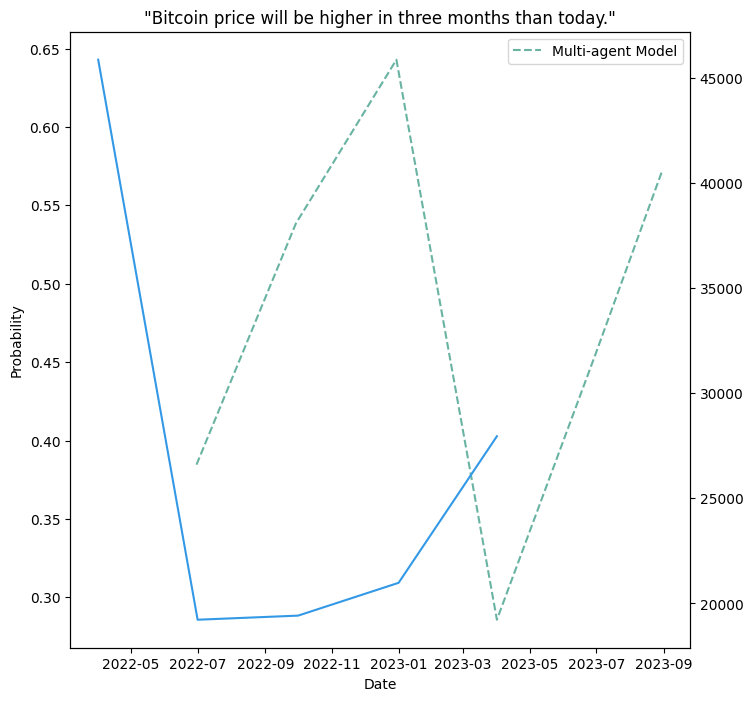

In [18]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

COLOR_SENTIMENT = "#69b3a2"
COLOR_SAP = "#3399e6"
  
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

# plotting the points 

ax1.plot([datetime(int(r[1][0:4]), int(r[1][4:6]), int(r[1][6:8])) + timedelta(days=90) for r in results.keys()], [(r.percent_in_favor) for r in results.values()], color=COLOR_SENTIMENT, linestyle="dashed", label="Multi-agent Model")
ax2.plot([datetime(int(r[0:4]), int(r[4:6]), int(r[6:8])) for r in ['20220401', '20220701', '20221001', '20230101', '20230401']], [r for r in [45857, 19224, 19419, 20979, 27950]], color=COLOR_SAP, label="538 Model")

ax1.set_ylabel("Probability")
ax1.set_xlabel("Date")

ax1.legend()
  
# giving a title to my graph
plt.title('"Bitcoin price will be higher in three months than today."')
  
# function to show the plot
plt.show()